In [1]:
import numpy as np
import matplotlib.pyplot as plt

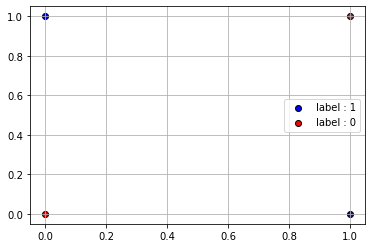

In [2]:
# XOR inputs & Corresponding outputs
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
Y_train = np.array([0, 1, 1, 0])

plt.scatter(X_train.T[Y_train==1][:, 0], X_train.T[Y_train==1][:, 1], color='b', edgecolor='k', label='label : 1')
plt.scatter(X_train.T[Y_train==0][:, 0], X_train.T[Y_train==0][:, 1], color='r', edgecolor='k', label='label : 0')
plt.grid(True)
plt.legend()

In [3]:
def sigmoid(z):
    # Your Code ...
    return 1 / (1 + np.exp(-z))
    # Your Code ...

In [4]:
# ReLU 함수정의
def ReLU(z):
    # Your Code ...
    # return z * (z > 0)
    # if 어쩌구 절시 ... (X)
    return np.maximum(0, z)
    # Your Code ...

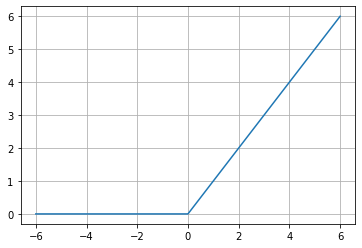

In [5]:
x_range = np.linspace(-6, 6, 500)
# You Code ...
plt.plot(x_range, ReLU(x_range))
plt.grid(True)
# You Code ...

In [6]:
def layer_sizes(X, Y):
    """   
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    # You Code ...
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    # You Code ...
    return (n_x, n_h, n_y)

In [7]:
# 임의의 데이터 ...
X = np.array([[-0.00416758, -0.00056267],
              [-0.02136196,  0.01640271],
              [-0.01793436, -0.00841747],
              [ 0.00502881, -0.01245288]]).T

# 1차원 데이터가 네 개
Y = np.array([[1.0],
              [0.0],
              [0.0],
              [1.0]]).T

In [8]:
# Your Code ...
n_x, n_h, n_y = layer_sizes(X, Y) 
# Your Code ...
print(n_x, n_h, n_y)

2 4 1


In [9]:
def initialize_parameters(n_x, n_h, n_y, init_scale_factor=1.0):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2019)
    
    # Your Code ...
    W1 = np.random.randn(n_h, n_x) * init_scale_factor
    b1 = np.random.randn(n_h, 1) * init_scale_factor
    W2 = np.random.randn(n_y, n_h) * init_scale_factor
    b2 = np.random.randn(n_y, 1) * init_scale_factor
    # Your Code ...
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [10]:
# n_x, n_h, n_y = layer_sizes(X, Y)

# Your Code ...
parameters = initialize_parameters(n_x, n_h, n_y)
# Your Code ...

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.21767896  0.82145535]
 [ 1.48127781  1.33186404]
 [-0.36186537  0.68560883]
 [ 0.57376143  0.28772767]]
b1 = [[-0.23563426]
 [ 0.95349024]
 [-1.6896253 ]
 [-0.34494271]]
W2 = [[ 0.0169049  -0.51498352  0.24450929 -0.18931261]]
b2 = [[2.67217242]]


In [11]:
def forward(X, parameters):
    """
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2(=Yhat) (probabilities)
    # A = Activation( W^t * X + bias )
    # Your Code ...
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    # Your Code ...
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [13]:
# n_x, n_h, n_y = layer_sizes(X, Y)
# parameters = initialize_parameters(n_x, n_h, n_y)

# Your Code ...
A2, cache = forward(X, parameters) # A2 = Y_hat
# Your Code ...

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

-0.3337054329700906 0.23439551512549126 2.18933310608959 0.899285984710742


$ J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \Big\{ y^{(i)}\log\left(\hat{y}^{(i)}\right) + (1-y^{(i)})\log\left(1- \hat{y}^{(i)}\right) \Big\} $

In [15]:
def compute_cost(A2, Y, parameters):
    """
    Returns: 
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example
    
    # Compute the cross-entropy cost
    # Your Code ...
    logprobs = -np.multiply(np.log(A2), Y) - np.multiply((1 - Y), np.log(1 - A2))
    cost = np.sum(logprobs) / m
    # Your Code ...
    
    cost = np.squeeze(cost) # 파이썬 숫자로 출력하기 위함 (E.g., turns [[17]] into 17)
    
    return cost

In [21]:
# n_x, n_h, n_y = layer_sizes(X, Y)
# parameters = initialize_parameters(n_x, n_h, n_y)
# A2, cache = forward(X, parameters) # A2 = Y_hat

A2 = np.array([[0.9999],
               [0.0001],
               [0.0001],
               [0.9999]]).T

'''
Y = np.array([[1.0],
              [0.0],
              [0.0],
              [1.0]]).T
'''

# BCE를 0.0으로 만들 수 있는가?
print("cost = " + str(compute_cost(A2, Y, parameters)))

cost = 0.00010000500033334732


dW1 = $\dfrac{\partial J(w) }{ \partial W_1 }$, db1 = $\dfrac{\partial J(w) }{ \partial b_1 }$ , dW2 = $\dfrac{\partial J(w) }{ \partial W_2 }$, db2 = $\dfrac{\partial J(w) }{ \partial b_2 }$

In [22]:
def backward(parameters, cache, X, Y):
    """
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1, Z1 and A2 from dictionary "cache".
    A1 = cache['A1']
    Z1 = cache['Z1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    # corresponding to 7 equations on slide above)
    # Your Code ...
    dZ2= (A2 - Y) / m
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dA1[Z1 < 0] = 0
    dZ1 = dA1
    dW1 = np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    # Your Code ...
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [24]:
# n_x, n_h, n_y = layer_sizes(X, Y)
# parameters = initialize_parameters(n_x, n_h, n_y)
# A2, cache = forward(X, parameters) # A2 = Y_hat

# Your Code ...
grads = backward(parameters, cache, X, Y)
# Your Code ...

print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.          0.        ]
 [ 0.00456242 -0.00109213]
 [ 0.          0.        ]
 [ 0.          0.        ]]
db1 = [[ 0.       ]
 [-0.2056257]
 [ 0.       ]
 [ 0.       ]]
dW2 = [[0.         0.37041662 0.         0.        ]]
db2 = [[0.39928598]]


 $ \theta = \theta - \alpha \dfrac{\partial J(w) }{ \partial \theta }$

In [25]:
def update_parameters(parameters, grads, learning_rate=0.01):
    """    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update rule for each parameter
    # Your Code ...
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    # Your Code ...
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [26]:
# n_x, n_h, n_y = layer_sizes(X, Y)
# parameters = initialize_parameters(n_x, n_h, n_y)
# A2, cache = forward(X, parameters) # A2 = Y_hat
# grads = backward(parameters, cache, X, Y)

# Your Code ...
parameters = update_parameters(parameters, grads, learning_rate=1.02) # Where are we wrong ?
# Your Code ...

In [27]:
# n_x, n_h, n_y = layer_sizes(X, Y)
# parameters = initialize_parameters(n_x, n_h, n_y)
# A2, cache = forward(X, parameters) # A2 = Y_hat
# compute_cost(A2, Y, parameters)
# grads = backward(parameters, cache, X, Y)
# parameters = update_parameters(parameters, grads, learning_rate=1.02) # Where are we wrong ?

def NN_2L(X, Y, n_h, num_iterations=10000, init_scale_factor=1.0, learning_rate=0.01, print_cost=False):

    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    # Your Code ...
    parameters = initialize_parameters(n_x, n_h, n_y, init_scale_factor)
    # Your Code ...

    # Epochs ...
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        # Your Code ...
        A2, cache = forward(X, parameters)
        # Your Code ...
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        # Your Code ...
        cost = compute_cost(A2, Y, parameters)
        # Your Code ...
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        # Your Code ...
        grads = backward(parameters, cache, X, Y)
        # Your Code ...

        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        # Your Code ...
        parameters = update_parameters(parameters, grads, learning_rate)
        # Your Code ...
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration [%i/%i]: %f" % (i, num_iterations, cost))

    return parameters

In [28]:
# XOR inputs & Corresponding outputs
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
Y_train = np.array([[0, 1, 1, 0]])

# Your Code ...
parameters = NN_2L(X_train, Y_train, n_h=4, num_iterations=10000, learning_rate=0.1, print_cost=True)
# Your Code ...

Cost after iteration [0/10000]: 0.944517
Cost after iteration [1000/10000]: 0.055541
Cost after iteration [2000/10000]: 0.016312
Cost after iteration [3000/10000]: 0.009011
Cost after iteration [4000/10000]: 0.006110
Cost after iteration [5000/10000]: 0.004587
Cost after iteration [6000/10000]: 0.003654
Cost after iteration [7000/10000]: 0.003025
Cost after iteration [8000/10000]: 0.002578
Cost after iteration [9000/10000]: 0.002242


In [29]:
def predict(parameters, X):
    """
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    # Your Code ...
    A2, _ = forward(X, parameters)
    predictions = np.round(A2)
    # Your Code ...
    
    return predictions

In [37]:
predictions = predict(parameters, X_train)
print(predictions)

[[0. 1. 1. 0.]]


In [45]:
# Accuracy 계산
def get_accuracy(A2, Y):
    # Your Code ...
    m = A2.shape[1]    
    return (A2 == Y).sum() / m
    # Your Code ...

In [46]:
print('Accuracy : {:.2%}'.format(get_accuracy(predictions, Y_train)))

Accuracy : 100.00%


In [53]:
import h5py

def load_dataset():
    train_dataset = h5py.File('data/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('data/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig.reshape(-1), test_set_x_orig, test_set_y_orig.reshape(-1), classes

X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.
Y_train = Y_train_orig.reshape(1, -1)
Y_test = Y_test_orig.reshape(1, -1)

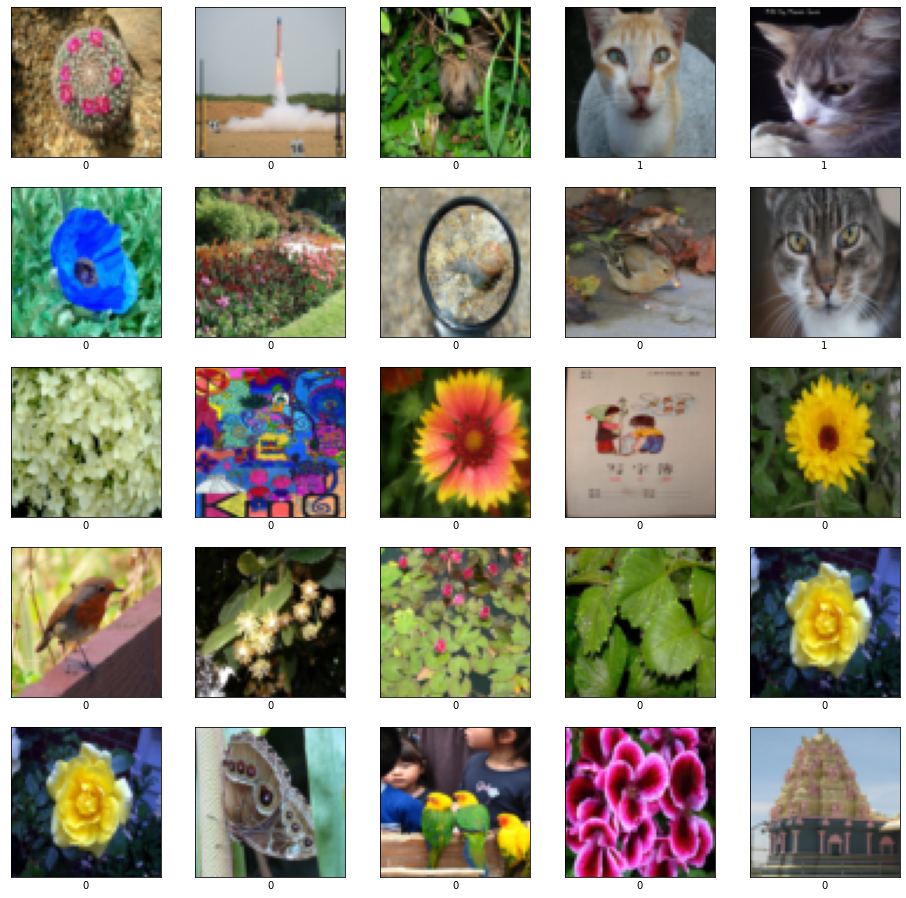

In [55]:
rndsuff = np.random.randint(0, len(X_train_orig)-1, size=len(X_train_orig), dtype='l')

# Sow images and labels
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_orig[rndsuff[i]], cmap=plt.cm.binary)
    plt.xlabel(Y_train_orig[rndsuff[i]])
plt.show()

In [56]:
X_train_orig.shape

(209, 64, 64, 3)

In [89]:
X_train.shape

(12288, 209)

In [58]:
X_test_orig.shape

(50, 64, 64, 3)

In [91]:
X_test.shape

(12288, 50)

In [88]:
# Your Code ... (Challenge)
parameters = NN_2L(X_train, Y_train, n_h=10, num_iterations=10000, init_scale_factor=0.01, learning_rate=0.0075, print_cost=True)
# Your Code ...

Cost after iteration [0/10000]: 0.694591
Cost after iteration [1000/10000]: 0.351730
Cost after iteration [2000/10000]: 0.056788
Cost after iteration [3000/10000]: 0.020182
Cost after iteration [4000/10000]: 0.010848
Cost after iteration [5000/10000]: 0.007064
Cost after iteration [6000/10000]: 0.005109
Cost after iteration [7000/10000]: 0.003944
Cost after iteration [8000/10000]: 0.003182
Cost after iteration [9000/10000]: 0.002649


In [93]:
# Report ...
predictions = predict(parameters, X_test)
wrong_idx = Y_test != predictions
print('Test acc : {:.2%}'.format(get_accuracy(predictions, Y_test)))
print("틀린갯수 : "+ str(len(predictions[wrong_idx])))

Test acc : 76.00%
틀린갯수 : 12


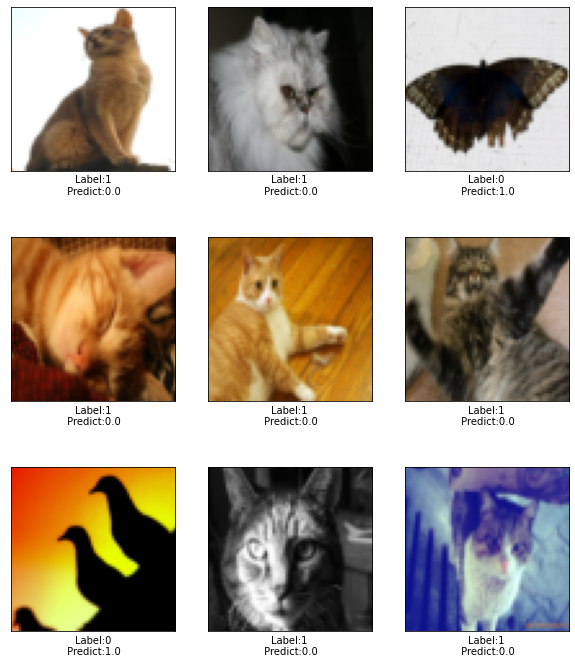

In [94]:
# Show images and labels
plt.figure(figsize=(10,12))
for i in range(9):
    plt.subplot(3, 3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test_orig[wrong_idx[0]][i], cmap=plt.cm.binary)
    plt.xlabel("Label:" + str(Y_test[wrong_idx][i])+"\n Predict:"+str(predictions[wrong_idx][i]))
plt.show()